In [1]:
import pandas as pd 


In [2]:
df = pd.read_csv("sharktank_data.csv.csv")

In [3]:
df

,Episode Number,Pitch Number,Brand,Idea,Investment Amount (In Lakhs INR),Debt (In lakhs INR),Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season
0,1,1,BluePine Industries,Frozen Momos,75,0,18%,N,Y,N,Y,N,Y,N,1
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,40,0,50%,N,Y,N,N,N,Y,N,1
2,1,3,Heart up my Sleeves,Detachable Sleeves,25,0,30%,Y,N,N,N,N,Y,N,1
3,2,4,Tagz Foods,Healthy Potato Chips,70,0,2.75%,N,Y,N,N,N,N,N,1
4,2,5,Head and Heart,Brain Development Course,0,0,0,N,N,N,N,N,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,34,113,Green Protein,Plant-Based Protein,0,0,0,N,N,N,N,N,N,N,1
113,34,114,On2Cook,Fastest Cooking Device,0,0,0,N,N,N,N,N,N,N,1
114,35,115,Jain Shikanji,Lemonade,40,0,30.00%,Y,Y,N,Y,N,Y,N,1
115,35,116,Woloo,Washroom Finder,0,0,0,N,N,N,N,N,N,N,1


In [4]:
print(df.head())

   Episode Number  Pitch Number                Brand  \
0               1             1  BluePine Industries   
1               1             2        Booz scooters   
2               1             3  Heart up my Sleeves   
3               2             4           Tagz Foods   
4               2             5       Head and Heart   

                                            Idea  \
0                                   Frozen Momos   
1  Renting e-bike for mobility in private spaces   
2                             Detachable Sleeves   
3                           Healthy Potato Chips   
4                       Brain Development Course   

   Investment Amount (In Lakhs INR)   Debt (In lakhs INR) Equity Anupam  \
0                                 75                    0    18%      N   
1                                 40                    0    50%      N   
2                                 25                    0    30%      Y   
3                                 70              

In [5]:
print(df.columns)

Index(['Episode Number', 'Pitch Number', 'Brand', 'Idea',
       'Investment Amount (In Lakhs INR) ', 'Debt (In lakhs INR)', 'Equity',
       'Anupam', 'Ashneer', 'Namita', 'Aman', 'Peyush', 'Vineeta', 'Ghazal',
       'Season'],
      dtype='object')


In [6]:
df.drop_duplicates(inplace = True)

In [7]:
df.columns = df.columns.str.strip()

In [8]:
df['Investment Amount (In Lakhs INR)'] = pd.to_numeric(df['Investment Amount (In Lakhs INR)'], errors='coerce')
df['Debt (In lakhs INR)'] = pd.to_numeric(df['Debt (In lakhs INR)'], errors='coerce')

In [9]:
sharks = ['Anupam', 'Ashneer', 'Namita', 'Aman', 'Peyush', 'Vineeta', 'Ghazal']
df['Total Sharks'] = df[sharks].apply(lambda row: (row == 'Y').sum(), axis=1)
print(df.head())

   Episode Number  Pitch Number                Brand  \
0               1             1  BluePine Industries   
1               1             2        Booz scooters   
2               1             3  Heart up my Sleeves   
3               2             4           Tagz Foods   
4               2             5       Head and Heart   

                                            Idea  \
0                                   Frozen Momos   
1  Renting e-bike for mobility in private spaces   
2                             Detachable Sleeves   
3                           Healthy Potato Chips   
4                       Brain Development Course   

   Investment Amount (In Lakhs INR)  Debt (In lakhs INR) Equity Anupam  \
0                                75                    0    18%      N   
1                                40                    0    50%      N   
2                                25                    0    30%      Y   
3                                70                   

In [10]:
top_funded = df.sort_values(by='Investment Amount (In Lakhs INR)', ascending=False)[['Brand', 'Investment Amount (In Lakhs INR)']].head(10)
print("🔝 Top 10 Funded Startups:")
print(top_funded)

🔝 Top 10 Funded Startups:
                   Brand  Investment Amount (In Lakhs INR)
95          Kabaddi Adda                                80
52            RoadBounce                                80
0    BluePine Industries                                75
33        Auli Lifestyle                                75
100             AyuRythm                                75
91           Wakao Foods                                75
7              Peeschute                                75
11                Bummer                                75
47          Beyond Water                                75
3             Tagz Foods                                70


NameError: name 'plt' is not defined

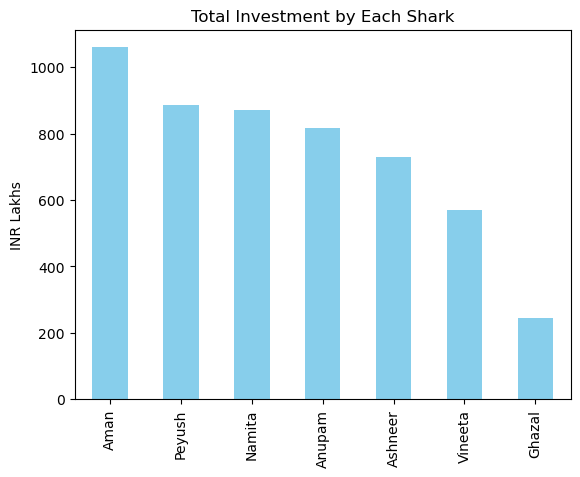

In [11]:
#total invested by each Shark Tank
shark_investments = {
    shark: df[df[shark] == 'Y']['Investment Amount (In Lakhs INR)'].sum()
    for shark in sharks
}

# Bar chart
pd.Series(shark_investments).sort_values(ascending=False).plot(kind='bar', title='Total Investment by Each Shark', ylabel='INR Lakhs', color='skyblue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
#most funded startup ideas 
top_ideas = df.groupby("Idea")["Investment Amount (In Lakhs INR)"].sum().sort_values(ascending=False).head(10)
print("💡 Most Funded Business Ideas:")
print(top_ideas)


💡 Most Funded Business Ideas:
Idea
Pothole Detection Software and Data    80
All-Kabaddi App                        80
Disposable Urine Bag                   75
Liquid Water Enhancer                  75
Ayurvedic Products                     75
Ayurvedic Wellness App                 75
Frozen Momos                           75
Underwear                              75
Jackfruit Products                     75
Healthy Potato Chips                   70
Name: Investment Amount (In Lakhs INR), dtype: int64


NameError: name 'plt' is not defined

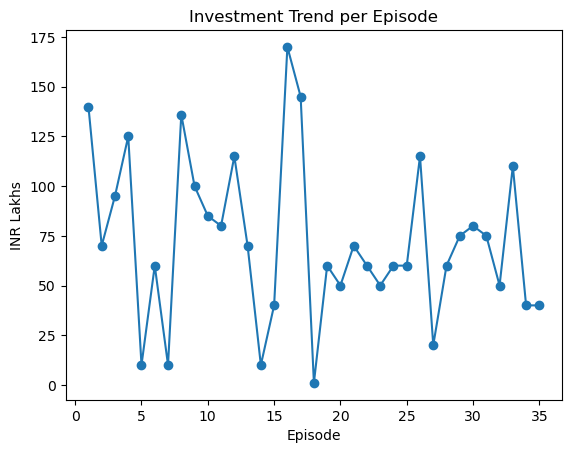

In [13]:
#investment trend per episode
ep_invest = df.groupby("Episode Number")["Investment Amount (In Lakhs INR)"].sum()
ep_invest.plot(kind='line', marker='o', title='Investment Trend per Episode', xlabel='Episode', ylabel='INR Lakhs')
plt.grid(True)
plt.show()


In [14]:
#multi shark deals 
multi_shark_deals = df[df['Total Sharks'] > 1]
print(f" Total multi-shark deals: {len(multi_shark_deals)}")
print(multi_shark_deals[['Brand', 'Total Sharks']].head())


 Total multi-shark deals: 43
                  Brand  Total Sharks
0   BluePine Industries             3
1         Booz scooters             2
2   Heart up my Sleeves             2
9                 Cosiq             2
11               Bummer             2


In [15]:
df.to_csv("shark_tank_cleaned.csv", index=False)
print("✅ Cleaned data exported for Tableau as 'shark_tank_cleaned.csv'")


✅ Cleaned data exported for Tableau as 'shark_tank_cleaned.csv'


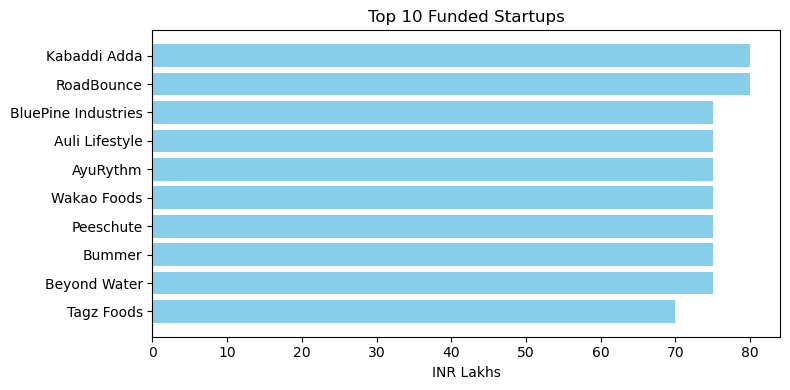

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("shark_tank_cleaned.csv")

# Example: Top funded startups bar chart
top = df.sort_values("Investment Amount (In Lakhs INR)", ascending=False).head(10)
plt.figure(figsize=(8,4))
plt.barh(top['Brand'], top['Investment Amount (In Lakhs INR)'], color='skyblue')
plt.title('Top 10 Funded Startups')
plt.xlabel('INR Lakhs')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top10_funded.png')


In [18]:
# Define funding stage manually (this logic is customizable)
# Remove % and convert to numeric
df['Equity'] = df['Equity'].astype(str).str.replace('%', '').str.strip()
df['Equity'] = pd.to_numeric(df['Equity'], errors='coerce')

def classify_stage(row):
    equity = row['Equity']
    investment = row['Investment Amount (In Lakhs INR)']
    
    if pd.isna(investment) or investment == 0:
        return "Rejected"
    elif equity > 15:
        return "Idea/Pre-seed"
    elif 7 < equity <= 15:
        return "Seed"
    else:
        return "Growth"

# Apply function
df['Funding Stage'] = df.apply(classify_stage, axis=1)


In [20]:
#stage wise inventmnets
stage_investment = df.groupby('Funding Stage')['Investment Amount (In Lakhs INR)'].mean().reset_index()
print(stage_investment)


   Funding Stage  Investment Amount (In Lakhs INR)
0         Growth                         36.863636
1  Idea/Pre-seed                         42.923077
2       Rejected                          0.000000
3           Seed                         35.882353


In [26]:
def assign_sector(idea):
    idea = idea.lower()
    if "food" in idea or "momos" in idea or "chips" in idea:
        return "Food & Beverage"
    elif "health" in idea or "brain" in idea or "protein" in idea:
        return "Health"
    elif "tech" in idea or "software" in idea or "platform" in idea:
        return "Tech"
    elif "fashion" in idea or "sleeves" in idea or "wear" in idea:
        return "Fashion"
    elif "bike" in idea or "scooter" in idea or "mobility" in idea:
        return "Mobility"
    else:
        return "Other"

df['Sector'] = df['Idea'].apply(assign_sector)


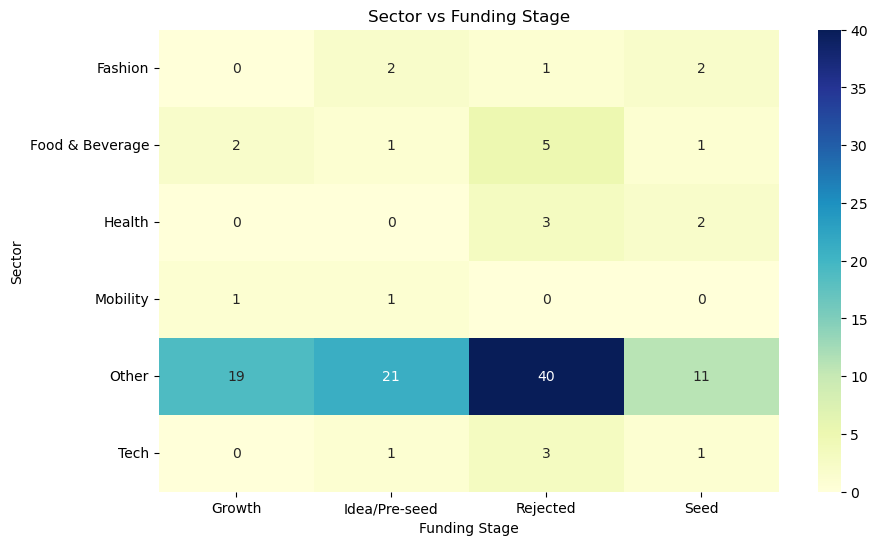

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sector_stage = df.groupby(['Sector', 'Funding Stage']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(sector_stage, annot=True, cmap="YlGnBu")
plt.title("Sector vs Funding Stage")
plt.ylabel("Sector")
plt.xlabel("Funding Stage")
plt.show()


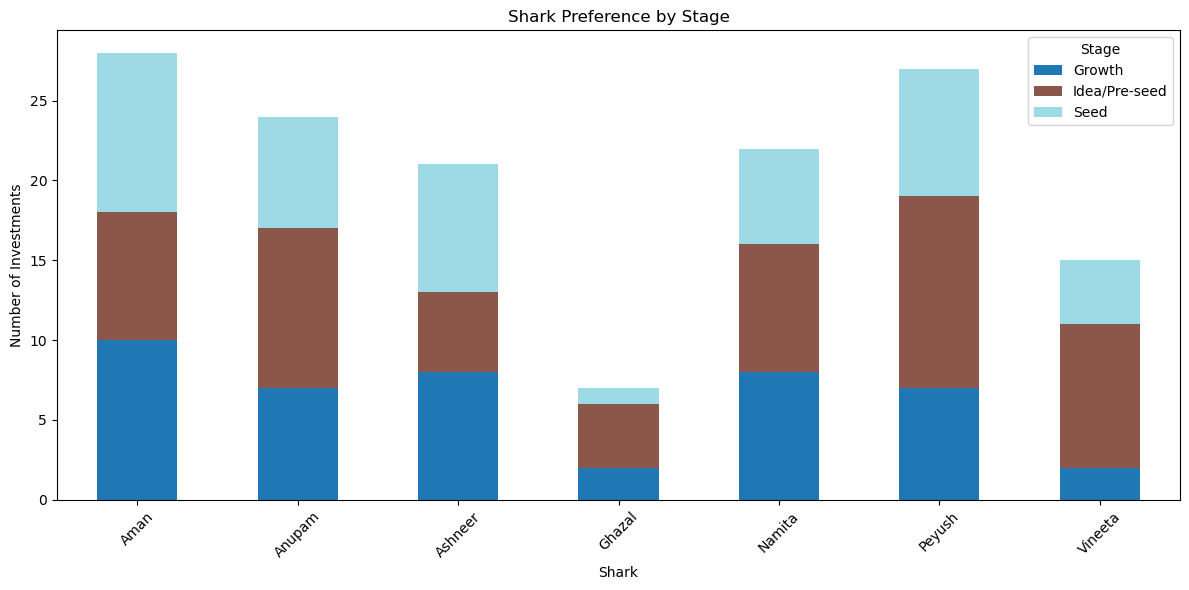

In [29]:
sharks = ['Anupam', 'Ashneer', 'Namita', 'Aman', 'Peyush', 'Vineeta', 'Ghazal']

# Convert Y/N to 1/0
for shark in sharks:
    df[shark] = df[shark].apply(lambda x: 1 if x == 'Y' else 0)

# Long format
df_long = df.melt(id_vars=['Funding Stage'], value_vars=sharks, var_name='Shark', value_name='Invested')
df_long = df_long[df_long['Invested'] == 1]

# Group and pivot
shark_stage_pref = df_long.groupby(['Shark', 'Funding Stage']).size().unstack(fill_value=0)

# Plot
shark_stage_pref.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Shark Preference by Stage")
plt.xlabel("Shark")
plt.ylabel("Number of Investments")
plt.xticks(rotation=45)
plt.legend(title="Stage")
plt.tight_layout()
plt.show()
